# DATA EXPLORATION

Link 1 : https://www.hackerearth.com/practice/machine-learning/linear-regression/multivariate-linear-regression-1/tutorial/

1. Gather Data
2. Describe Data (names and meaning of values)
3. Data Cleaning and Validation
    - remove outliers
    - fill missing values
    - standardize [0,1] etc.
    - да се махнат излишни колони (атмосферно налягане?? и feelsLike)
    - да се обединят колони (вместо отделни колони за работен ден и празник да е в една колона с различен цифров код?)
    - да се запише в отделен csv файл за да се ползва наготово
4. INPUT Correlation
    - проверка за корелация между отделните входове, ако е много силна, да се използва само един вход и така модела ще се опрости

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Прочитане на данни за времето

In [2]:
weather_header = ['maxtempC','mintempC','tempC','windspdKmph','winddir16',
  'humidity','pressure','cloudcover','feelslikeC','workingday','bankholiday','workingsat']

In [3]:
weather_data = pd.read_csv('data/retail/U.csv',header = None, names = weather_header)
weather_data.head()

,maxtempC,mintempC,tempC,windspdKmph,winddir16,humidity,pressure,cloudcover,feelslikeC,workingday,bankholiday,workingsat
0,14,2,12,15,8,59,1003,41,13,1,0,0
1,6,0,7,19,10,53,1009,27,3,1,0,0
2,10,0,11,14,10,43,1012,14,10,1,0,0
3,15,0,15,10,6,40,1011,29,15,1,0,0
4,14,1,13,13,6,53,1008,28,13,1,0,0


## Проверка за липсващи стойности (NaN-s) (няма такива)

In [4]:
pd.isnull(weather_data).any()

maxtempC       False
mintempC       False
tempC          False
windspdKmph    False
winddir16      False
humidity       False
pressure       False
cloudcover     False
feelslikeC     False
workingday     False
bankholiday    False
workingsat     False
dtype: bool

### Премахване на атмосферно налягане и посоката на вятъра от данните
+ Опростява модела
- Може да се загуби важна информация

In [5]:
weather_data.drop(['pressure'],axis=1, inplace = True);
weather_data.drop(['winddir16'],axis=1, inplace = True);

### Категоризиране на вида работен ден (обединява три колони в една)
0. почивен ден
1. работен ден
2. работна събота
3. празник

In [6]:
# NEW COLUMN
# default is 0
weather_data['workday'] = 0

# loop through all
rows = weather_data.count()[0]

for i in range(0,rows):
    if weather_data['workingday'][i] == 1:
        weather_data['workday'][i] = 1
    if weather_data['bankholiday'][i] == 1:
        weather_data['workday'][i] = 3
    if weather_data['workingsat'][i] == 1:
        weather_data['workday'][i] = 2
        

### Премахване на 3-те колони (остава само новата)

In [7]:
weather_data.drop(['workingday'],axis=1, inplace = True)
weather_data.drop(['workingsat'],axis=1, inplace = True)
weather_data.drop(['bankholiday'],axis=1, inplace = True)

In [8]:
weather_data[100:120]

,maxtempC,mintempC,tempC,windspdKmph,humidity,cloudcover,feelslikeC,workday
100,26,8,25,11,42,31,26,1
101,17,0,17,12,70,43,19,1
102,23,2,24,13,47,22,27,3
103,27,5,27,11,35,12,28,0
104,28,6,27,11,33,13,28,0
105,27,6,27,12,34,14,28,1
106,25,6,25,12,53,20,29,1
107,26,6,27,14,43,15,29,2
108,27,5,27,13,43,14,28,3
109,27,7,27,13,40,13,29,3


## Plots of all Data Columns

### Temperature

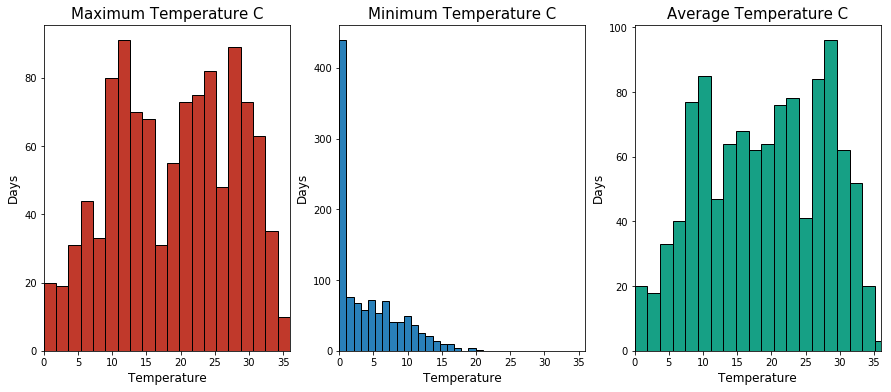

In [9]:
plt.figure(figsize=(15,6))

plt.subplot(1, 3, 1)
plt.hist(weather_data['maxtempC'], bins = 20, ec='black', color='#c0392b')
# ec - edge color, more visibility between bins
# bins - number of bins
plt.title('Maximum Temperature C',fontsize=15)
plt.xlabel('Temperature',fontsize=12)
plt.ylabel('Days',fontsize=12)

# forces X-axis to specific limits
# 0 is minimum temperature in the dataset
# 36 is the maximum temperature in the dataset
axes = plt.gca()
axes.set_xlim([0,36])

plt.subplot(1, 3, 2)

plt.hist(weather_data['mintempC'], bins = 20, ec='black', color='#2980b9')

plt.title('Minimum Temperature C',fontsize=15)
plt.xlabel('Temperature',fontsize=12)
plt.ylabel('Days',fontsize=12)

axes = plt.gca()
axes.set_xlim([0,36])

plt.subplot(1, 3, 3)

plt.hist(weather_data['tempC'], bins = 20, ec='black', color='#16a085')

plt.title('Average Temperature C',fontsize=15)
plt.xlabel('Temperature',fontsize=12)
plt.ylabel('Days',fontsize=12)

axes = plt.gca()
axes.set_xlim([0,36])


plt.show()

### Всякакви средни температури ще са завишени, защото минималната температура е ограничена до 0 градуса. Може би трябва да се използва колоната FeelsLike като средна температура, защото тя (предполагаемо) показва по-добре средната температура през деня.

### Сравнение между средна температура и Feels Like

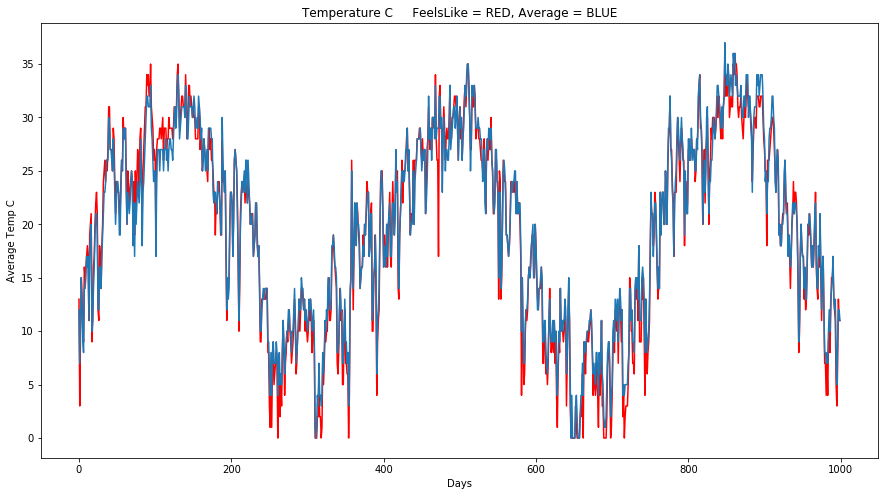

In [10]:
plt.figure(figsize=(15,8))

plt.plot(weather_data['feelslikeC'][0:1000],color = 'red')
plt.plot(weather_data['tempC'][0:1000])

plt.title('Temperature C     FeelsLike = RED, Average = BLUE')
plt.xlabel('Days',fontsize = 10)
plt.ylabel('Average Temp C',fontsize = 10)


plt.show()

#### Не се забелязват значителни разлики. За повечето данни двете температури са еднакви. FeelsLike често е по-ниска от Average (както се очакваше), въпреки че и тези показания са ограничени до 0 градуса минимум

## Wind Speed / Humidity / Cloud Cover

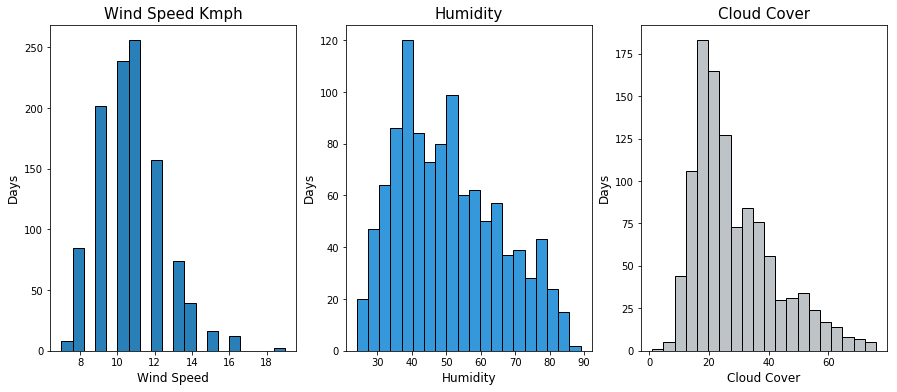

In [11]:
plt.figure(figsize=(15,6))

plt.subplot(1, 3, 1)
plt.hist(weather_data['windspdKmph'], bins = 20, ec='black', color='#2980b9')
# ec - edge color, more visibility between bins
# bins - number of bins
plt.title('Wind Speed Kmph',fontsize=15)
plt.xlabel('Wind Speed',fontsize=12)
plt.ylabel('Days',fontsize=12)

# forces X-axis to specific limits
# 0 is minimum temperature in the dataset
# 36 is the maximum temperature in the dataset
#axes = plt.gca()
#axes.set_xlim([0,36])

plt.subplot(1, 3, 2)

plt.hist(weather_data['humidity'], bins = 20, ec='black', color='#3498db')

plt.title('Humidity',fontsize=15)
plt.xlabel('Humidity',fontsize=12)
plt.ylabel('Days',fontsize=12)


plt.subplot(1, 3, 3)

plt.hist(weather_data['cloudcover'], bins = 20, ec='black', color='#bdc3c7')

plt.title('Cloud Cover',fontsize=15)
plt.xlabel('Cloud Cover',fontsize=12)
plt.ylabel('Days',fontsize=12)

plt.show()

### В графиката за скорост на вятъра се забелязват няколко дни със скорости на вятъра над 18 км/ч (outliers?). Те са незначителна част от цялата информация и ще бъдат заместени с по-често срещаните 16 км/ч

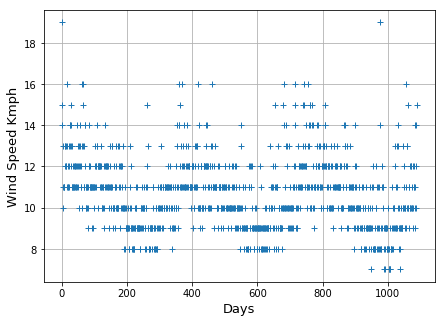

In [12]:
plt.figure(figsize=(7,5))
plt.plot(weather_data['windspdKmph'],"+")
plt.xlabel("Days",fontsize=13)
plt.ylabel("Wind Speed Kmph",fontsize=13)
plt.grid()
plt.show()

In [13]:
weather_data['windspdKmph'].loc[weather_data['windspdKmph'] > 16] = 16

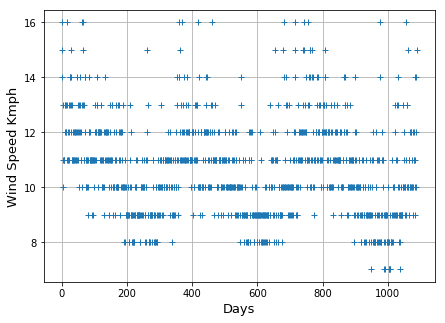

In [14]:
plt.figure(figsize=(7,5))
plt.plot(weather_data['windspdKmph'],"+")
plt.xlabel("Days",fontsize=13)
plt.ylabel("Wind Speed Kmph",fontsize=13)
plt.grid()
plt.show()

## Обща статистическа информация

In [15]:
mean_temp = round(weather_data['tempC'].mean(),2)
mean_wind_speed = round(weather_data['windspdKmph'].mean(),2)
mean_cloud_cover = round(weather_data['humidity'].mean(),2)
mean_humidity = round(weather_data['cloudcover'].mean(),2)

print("Средна температура:",mean_temp,"C")
print("Средна скорост на вятъра:",mean_wind_speed, "km/h")
print("Средна облачност:",mean_cloud_cover)
print("Средна влажност:",mean_humidity)

Средна температура: 18.96 C
Средна скорост на вятъра: 10.66 km/h
Средна облачност: 50.44
Средна влажност: 28.43


## Корелационна матрица [-1 : 1]
### Изчисляват се корелациите на всяка колона с всички останали колони.
### Разглеждат се по-силните положителни / отрицателни корелации.

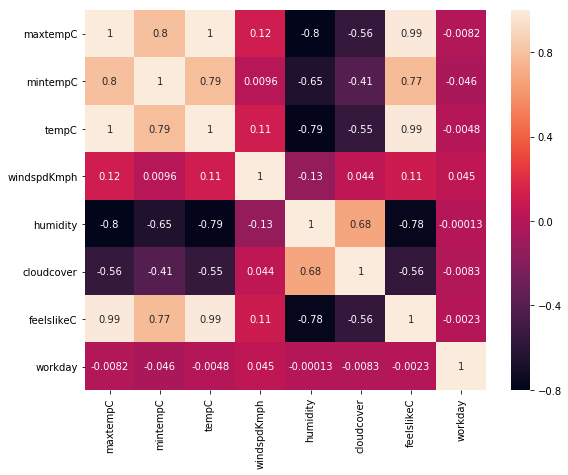

In [16]:
plt.figure(figsize=(9,7))
sns.heatmap(weather_data.corr(), annot=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Само половината матрица носи информация (под / над главния диагонал).
### Създава се диагонална матрица която служи като маска и скрива половината стойности

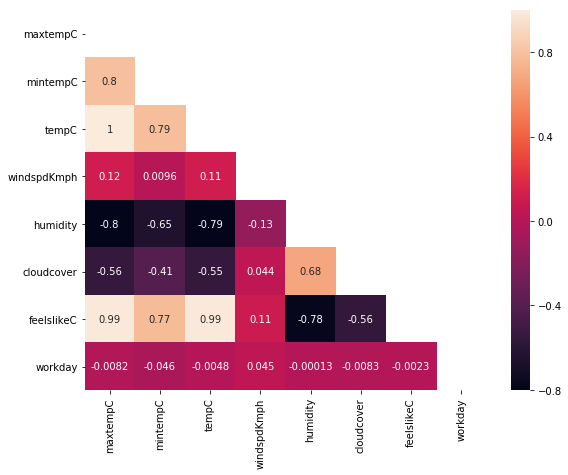

In [17]:
mask = np.zeros_like(weather_data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(9,7))
sns.heatmap(weather_data.corr(), mask = mask, annot=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Корелации
| Колони | Корелация | Стойност | Извод |
| --- | --- | --- | --- |
| <b>ВЛАЖНОСТ / ТЕМПЕРАТУРА</b> | силно отрицателна | -0.79 | с увеличаване на температурата влажността намалява |
| <b>ОБЛАЧНОСТ / ТЕМПЕРАТУРА</b> | отрицателна | -0.5 | с увеличаване на температурата облачността намалява |
| <b>Feels Like / ТЕМПЕРАТУРА</b> | силно положителна | 0.9 | възможно съкращаване на колони, аналогични стойности |
| <b>ОБЛАЧНОСТ / ВЛАЖНОСТ</b> | положителна | 0.68 | с увеличаване на влажността облачността се увеличава |

### Графика на корелациите

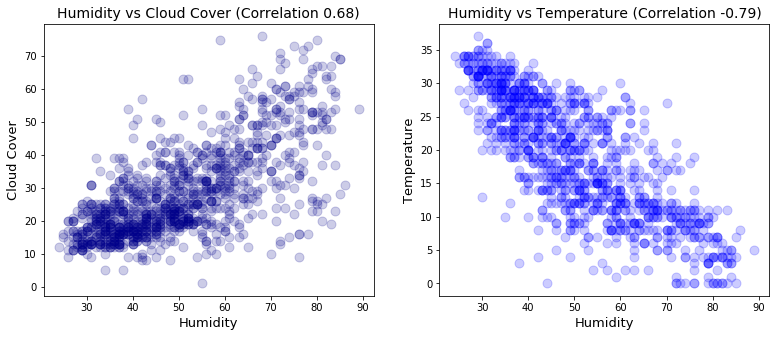

In [18]:
plt.figure(figsize=(13,5))

plt.subplot(1, 2, 1)
hum_cloud_corr = round(weather_data['humidity'].corr(weather_data['cloudcover']),2)

plt.scatter(x=weather_data['humidity'],y=weather_data['cloudcover'],alpha=0.2, s=80, color='darkblue')
plt.title(f'Humidity vs Cloud Cover (Correlation {hum_cloud_corr})',fontsize=14)
plt.xlabel("Humidity",fontsize=13)
plt.ylabel("Cloud Cover",fontsize=13)

plt.subplot(1, 2, 2)
hum_temp_corr = round(weather_data['humidity'].corr(weather_data['tempC']),2)

plt.scatter(x=weather_data['humidity'],y=weather_data['tempC'],alpha=0.2, s=80, color='blue')
plt.title(f'Humidity vs Temperature (Correlation {hum_temp_corr})',fontsize=14)
plt.xlabel("Humidity",fontsize=13)
plt.ylabel("Temperature",fontsize=13)

plt.show()

## Нормализиране на данните

- Нужно ли е нормализиране? 
- В какъв интервал да се нормализира? [-1 : 1] или [0 : 1] ?
- Всички колони ли трябва да се нормализират? (__humidity__ и __cloudcover__ са с по-високи стойности от всички останали)

In [19]:
weather_data.head()

,maxtempC,mintempC,tempC,windspdKmph,humidity,cloudcover,feelslikeC,workday
0,14,2,12,15,59,41,13,1
1,6,0,7,16,53,27,3,1
2,10,0,11,14,43,14,10,1
3,15,0,15,10,40,29,15,1
4,14,1,13,13,53,28,13,1


## Записване на новия, съкратен DataFrame

In [20]:
short_weather_header = ['maxtempC','mintempC','tempC','windspdKmph',
  'humidity','cloudcover','feelslikeC','workday']

In [21]:
weather_data.to_csv('data/retail/U_short.csv',header = None)

In [22]:
weather_data_test = pd.read_csv('data/retail/U_short.csv',header = None, names = short_weather_header)
weather_data_test.head()

,maxtempC,mintempC,tempC,windspdKmph,humidity,cloudcover,feelslikeC,workday
0,14,2,12,15,59,41,13,1
1,6,0,7,16,53,27,3,1
2,10,0,11,14,43,14,10,1
3,15,0,15,10,40,29,15,1
4,14,1,13,13,53,28,13,1
